In [1]:
#Anusha Seshadri - 20BCI0209
#anusha.seshadri2020@vitstudent.ac.in
#VIT Vellore

In [1]:
#load the dataset

import pandas as pd
file_path = "/Users/anushaseshadri/Downloads/titanic.csv"
df = pd.read_csv(file_path)
print(df)


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

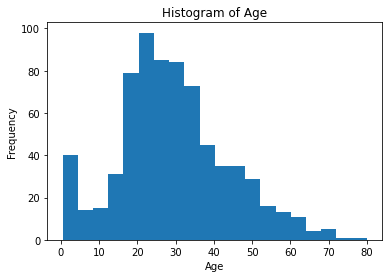

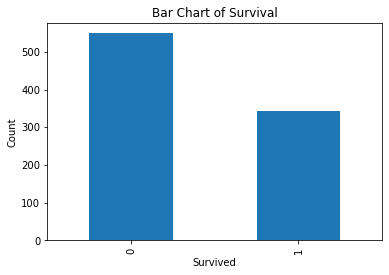

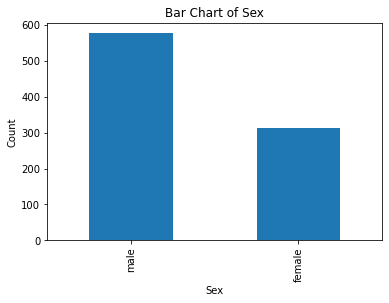

In [2]:
#univariate analysis

import matplotlib.pyplot as plt



# Histogram of a numerical variable
df['age'].plot(kind='hist', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Bar chart of a categorical variable
df['survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar Chart of Survival')
plt.show()

# Bar chart of another categorical variable
df['sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Bar Chart of Sex')
plt.show()

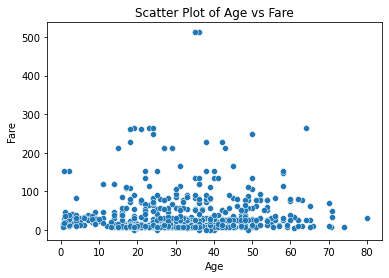

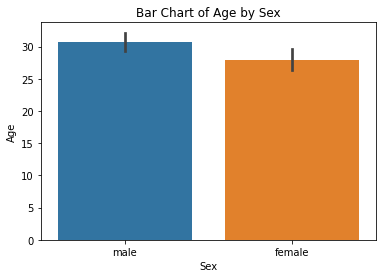

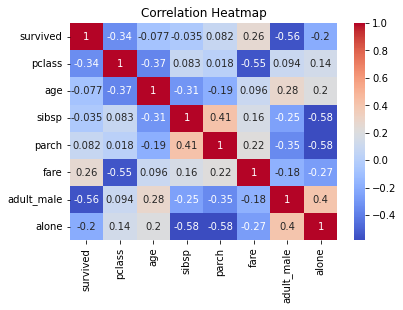

In [3]:
#bi-var analysis

import seaborn as sns
sns.scatterplot(data=df, x='age', y='fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare')
plt.show()

# Bar chart of a categorical variable with respect to a numerical variable
sns.barplot(data=df, x='sex', y='age')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Bar Chart of Age by Sex')
plt.show()

# Heatmap of correlation between numerical variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

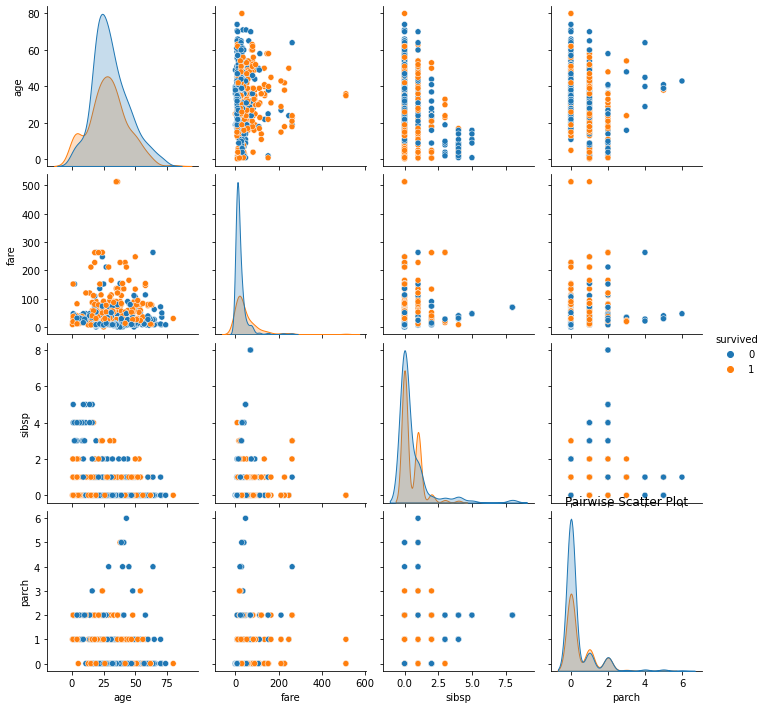

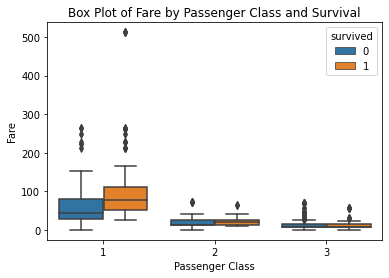

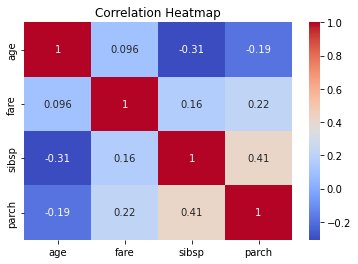

In [4]:
# Perform multivariate analysis

# Pairwise scatter plot of multiple numerical variables
sns.pairplot(data=df, vars=['age', 'fare', 'sibsp', 'parch'], hue='survived')
plt.title('Pairwise Scatter Plot')
plt.show()

# Box plot of a numerical variable across different categories
sns.boxplot(data=df, x='pclass', y='fare', hue='survived')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Box Plot of Fare by Passenger Class and Survival')
plt.show()

# Heatmap of correlation between multiple numerical variables
corr_matrix = df[['age', 'fare', 'sibsp', 'parch']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# Descriptive statistics
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [6]:
#check for missing values

print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [9]:
# Handle missing values
# Fill missing values with mean/median/mode
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode(), inplace=True)
df['deck'].fillna(df['deck'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Check again for missing values after handling
print(df.isnull().sum())


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [10]:
# Drop rows with missing values
df.dropna(inplace=True)
print(df.isnull().sum())


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [12]:
# Find and replace outliers using z-score method
import numpy as np

z_score_threshold = 3
z_scores = np.abs((df - df.mean()) / df.std())

outliers = (z_scores > z_score_threshold)

# Replace outliers with NaN or a specific value
df[outliers] = np.nan  

# Check the replaced outliers in the DataFrame
print(df[outliers])

     survived  pclass  sex  age  sibsp  parch  fare embarked class  who  \
0         NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
1         NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
2         NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
3         NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
4         NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
..        ...     ...  ...  ...    ...    ...   ...      ...   ...  ...   
886       NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
887       NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
888       NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
889       NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
890       NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   

    adult_male deck embark_town alive alone  
0          NaN  NaN         NaN   NaN   NaN  
1      

/var/folders/fk/hrytsgcn5nxf1z1q5cv54lnm0000gn/T/ipykernel_11291/2072163868.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((df - df.mean()) / df.std())
/var/folders/fk/hrytsgcn5nxf1z1q5cv54lnm0000gn/T/ipykernel_11291/2072163868.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((df - df.mean()) / df.std())


In [13]:
# Perform encoding for each categorical column


from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform encoding for each categorical column
for column in categorical_columns:
    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit and transform the column
    df[column] = label_encoder.fit_transform(df[column])

# Print the encoded DataFrame
print(df)

     survived  pclass  sex        age  sibsp  parch     fare  embarked  class  \
0           0       3    1  22.000000    1.0    0.0   7.2500         2      2   
1           1       1    0  38.000000    1.0    0.0  71.2833         0      0   
2           1       3    0  26.000000    0.0    0.0   7.9250         2      2   
3           1       1    0  35.000000    1.0    0.0  53.1000         2      0   
4           0       3    1  35.000000    0.0    0.0   8.0500         2      2   
..        ...     ...  ...        ...    ...    ...      ...       ...    ...   
886         0       2    1  27.000000    0.0    0.0  13.0000         2      1   
887         1       1    0  19.000000    0.0    0.0  30.0000         2      0   
888         0       3    0  29.699118    1.0    2.0  23.4500         2      2   
889         1       1    1  26.000000    0.0    0.0  30.0000         0      0   
890         0       3    1  32.000000    0.0    0.0   7.7500         1      2   

     who  adult_male  deck 

In [15]:
#Split the data into dependent and independent variables.

X = df.drop("alive", axis=1)  # Independent variables (features)
y = df["alive"]  # Dependent variable

# Print the independent variables
print(X.head())

# Print the dependent variable
print(y.head())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         0       3    1  22.0    1.0    0.0   7.2500         2      2    1   
1         1       1    0  38.0    1.0    0.0  71.2833         0      0    2   
2         1       3    0  26.0    0.0    0.0   7.9250         2      2    2   
3         1       1    0  35.0    1.0    0.0  53.1000         2      0    2   
4         0       3    1  35.0    0.0    0.0   8.0500         2      2    1   

   adult_male  deck  embark_town  alone  
0        True     2            2  False  
1       False     2            0  False  
2       False     2            2   True  
3       False     2            2  False  
4        True     2            2   True  
0    0
1    1
2    1
3    1
4    0
Name: alive, dtype: int64


In [17]:
#Scale the independent variables

from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(X)

# Scale the independent variables
X_scaled = scaler.transform(X)
print(X)

     survived  pclass  sex        age  sibsp  parch     fare  embarked  class  \
0           0       3    1  22.000000    1.0    0.0   7.2500         2      2   
1           1       1    0  38.000000    1.0    0.0  71.2833         0      0   
2           1       3    0  26.000000    0.0    0.0   7.9250         2      2   
3           1       1    0  35.000000    1.0    0.0  53.1000         2      0   
4           0       3    1  35.000000    0.0    0.0   8.0500         2      2   
..        ...     ...  ...        ...    ...    ...      ...       ...    ...   
886         0       2    1  27.000000    0.0    0.0  13.0000         2      1   
887         1       1    0  19.000000    0.0    0.0  30.0000         2      0   
888         0       3    0  29.699118    1.0    2.0  23.4500         2      2   
889         1       1    1  26.000000    0.0    0.0  30.0000         0      0   
890         0       3    1  32.000000    0.0    0.0   7.7500         1      2   

     who  adult_male  deck 

In [18]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

# Assuming X is your independent variable matrix and y is your dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data:")
print("X_train:", X_train)
print("y_train:", y_train)
print()

print("Testing Data:")
print("X_test:", X_test)
print("y_test:", y_test)

Training Data:
X_train:      survived  pclass  sex        age  sibsp  parch      fare  embarked  \
708         1       1    0  22.000000    0.0    0.0  151.5500         2   
240         0       3    0  29.699118    1.0    0.0   14.4542         0   
382         0       3    1  32.000000    0.0    0.0    7.9250         2   
792         0       3    0  29.699118    NaN    2.0   69.5500         2   
683         0       3    1  14.000000    NaN    2.0   46.9000         2   
..        ...     ...  ...        ...    ...    ...       ...       ...   
107         1       3    1  29.699118    0.0    0.0    7.7750         2   
271         1       3    1  25.000000    0.0    0.0    0.0000         2   
862         1       1    0  48.000000    0.0    0.0   25.9292         2   
436         0       3    0  21.000000    2.0    2.0   34.3750         2   
103         0       3    1  33.000000    0.0    0.0    8.6542         2   

     class  who  adult_male  deck  embark_town  alone  
708      0    2    